**Deteksi Tepi Pola Objek**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
image = cv2.imread('FotoDiri2M.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 75, 150)

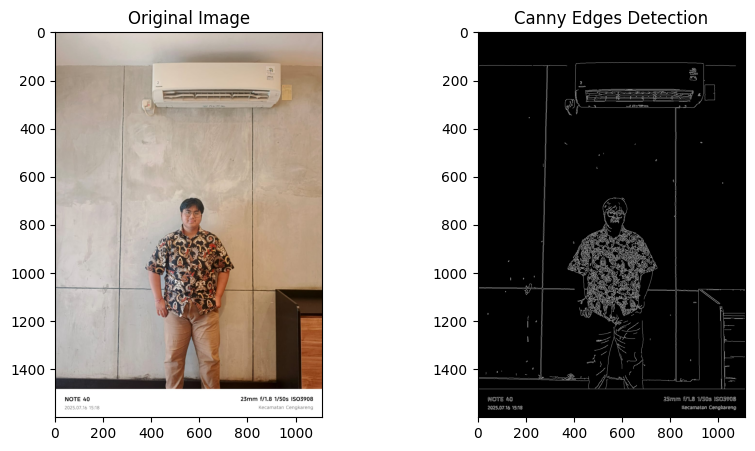

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[1].imshow(edges, cmap='gray')
axs[1].set_title('Canny Edges Detection')
plt.show()

In [ ]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 80, minLineLength=50, maxLineGap=10)
image_lines = image.copy()

In [ ]:
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

In [ ]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_contours = image.copy()
cv2.drawContours(image_contours, contours, -1, (0, 255, 0), 2)

array([[[170, 179, 188],
        [170, 179, 188],
        [170, 179, 188],
        ...,
        [168, 176, 193],
        [168, 176, 193],
        [168, 176, 193]],

       [[170, 179, 188],
        [170, 179, 188],
        [170, 179, 188],
        ...,
        [168, 176, 193],
        [168, 176, 193],
        [168, 176, 193]],

       [[170, 179, 188],
        [170, 179, 188],
        [170, 179, 188],
        ...,
        [168, 176, 193],
        [168, 176, 193],
        [168, 176, 193]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

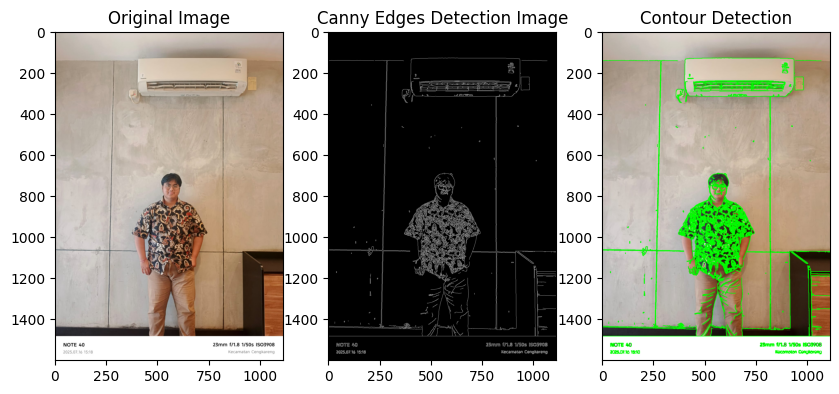

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
ax = axs.ravel()
ax[0].imshow(image_rgb)
ax[0].set_title('Original Image')
ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Canny Edges Detection Image')
ax[2].imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
ax[2].set_title('Contour Detection')
plt.show()

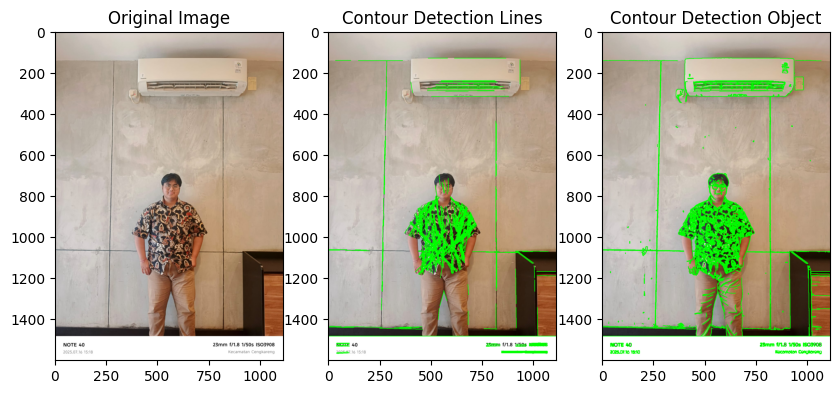

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
ax = axs.ravel()
ax[0].imshow(image_rgb)
ax[0].set_title('Original Image')
ax[1].imshow(cv2.cvtColor(image_lines, cv2.COLOR_BGR2RGB))
ax[1].set_title('Contour Detection Lines')
ax[2].imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
ax[2].set_title('Contour Detection Object')
plt.show()

**Geometrix Citra**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("FotoDiri1M.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
rows, cols, _ = img.shape

M_rotasi = cv2.getRotationMatrix2D(center=((cols-1)/2.0, (rows-1)/2.0), angle=45, scale=1.0)
img_rotated = cv2.warpAffine(img, M_rotasi, (cols, rows))
img_rotated_rgb = cv2.cvtColor(img_rotated, cv2.COLOR_BGR2RGB)

In [ ]:
new_width = int(cols * 0.3)
new_height = int(rows * 0.5)
img_resized = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)
img_resized_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

In [ ]:
pts1 = np.float32([
    [58, 774],
    [1023, 774],
    [58, 1170],
    [1023, 1170]
])

width = int(pts1[1][0] - pts1[0][0])
height = int(pts1[2][1] - pts1[0][1])

pts2 = np.float32([
    [0, 0],
    [width, 0],
    [0, height],
    [width, height]
])

matrix = cv2.getPerspectiveTransform(pts1, pts2)
img_warped = cv2.warpPerspective(img, matrix, (width, height))
img_warped_rgb = cv2.cvtColor(img_warped, cv2.COLOR_BGR2RGB)

In [ ]:
img_flipped_horz = cv2.flip(img, 1)
img_flipped_horz_rgb = cv2.cvtColor(img_flipped_horz, cv2.COLOR_BGR2RGB)

In [ ]:
tx, ty = 100, 50
M_translasi = np.float32([[1, 0, tx], [0, 1, ty]])
img_translated = cv2.warpAffine(img, M_translasi, (cols, rows))
img_translated_rgb = cv2.cvtColor(img_translated, cv2.COLOR_BGR2RGB)

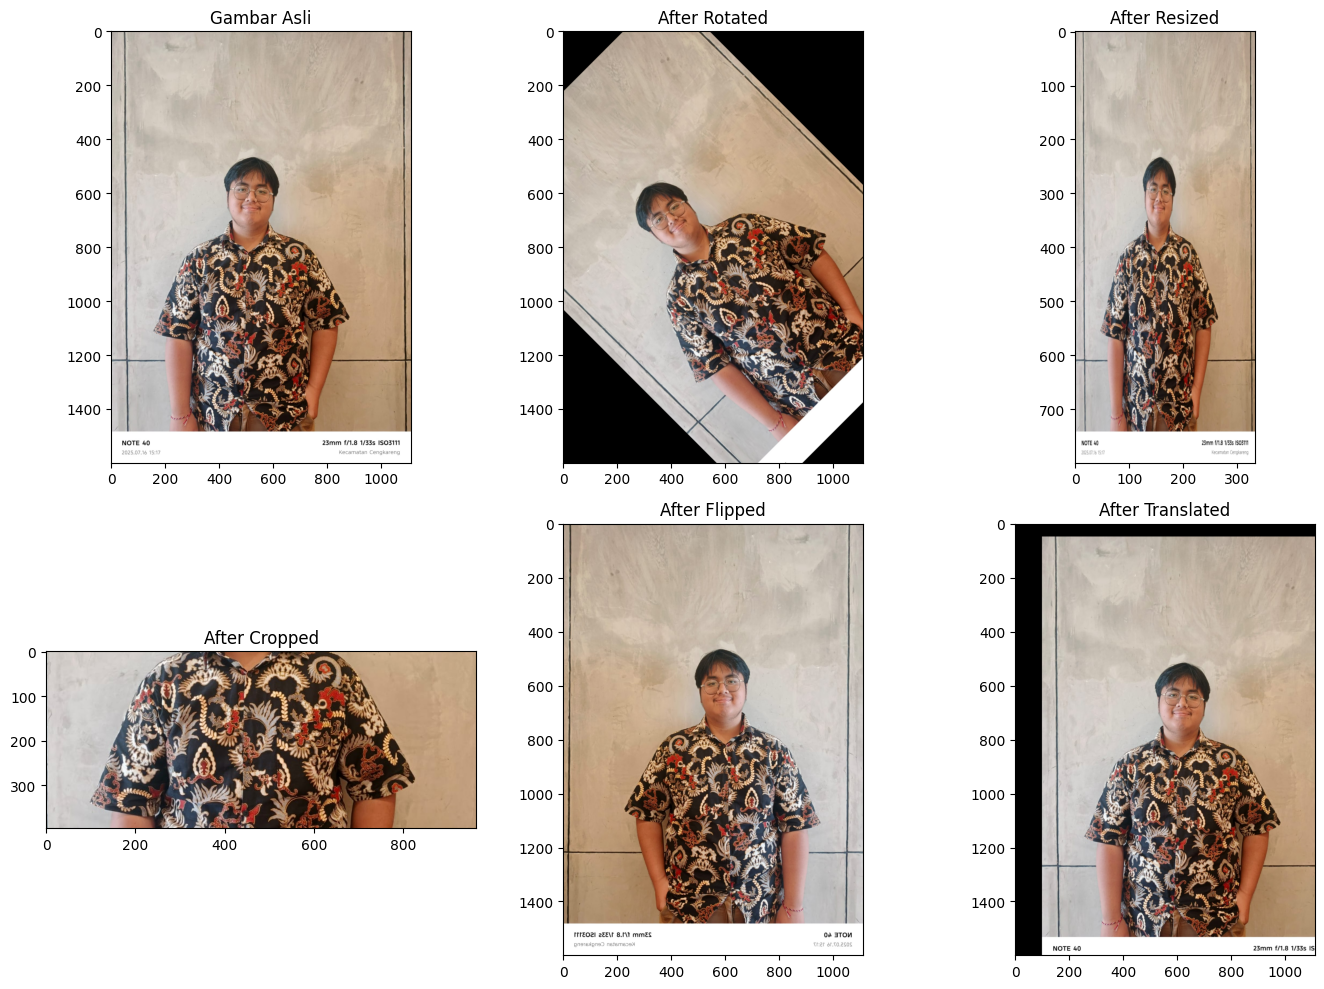

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(14, 10))
axs[0][0].imshow(img_rgb)
axs[0][0].set_title('Gambar Asli')

axs[0][1].imshow(img_rotated_rgb)
axs[0][1].set_title('After Rotated')

axs[0][2].imshow(img_resized_rgb)
axs[0][2].set_title('After Resized')

axs[1][0].imshow(img_warped_rgb)
axs[1][0].set_title('After Cropped')

axs[1][1].imshow(img_flipped_horz_rgb)
axs[1][1].set_title('After Flipped')

axs[1][2].imshow(img_translated_rgb)
axs[1][2].set_title('After Translated')

plt.tight_layout()
plt.show()

**Kompresi**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
jpg = 'FotoDiri1M.jpg'
jpg_ori = cv2.imread(jpg)

In [ ]:
jpg_low = 'gambar_lossy_kualitas_10.jpg'
#kualitas 10
cv2.imwrite(jpg_low, jpg_ori, [cv2.IMWRITE_JPEG_QUALITY, 10])
img_lossy_low = cv2.imread(jpg_low)

num_q_level = 4
bin_size = 256 / num_q_level
img_q = (jpg_ori // bin_size) * bin_size
img_q = np.uint8(img_q)

size_asli = os.path.getsize(jpg)
size_jpg_low = os.path.getsize(jpg_low)
size_q = os.path.getsize(jpg)
print(f"Ukuran file asli: {size_asli / 1024:.2f} KB")
print(f"Ukuran file JPG (lossy): {size_jpg_low / 1024:.2f} KB")
print(f"Ukuran file Kuantisasi RGB: {size_q / 1024:.2f} KB")

Ukuran file asli: 181.30 KB
Ukuran file JPG (lossy): 56.13 KB
Ukuran file Kuantisasi RGB: 181.30 KB


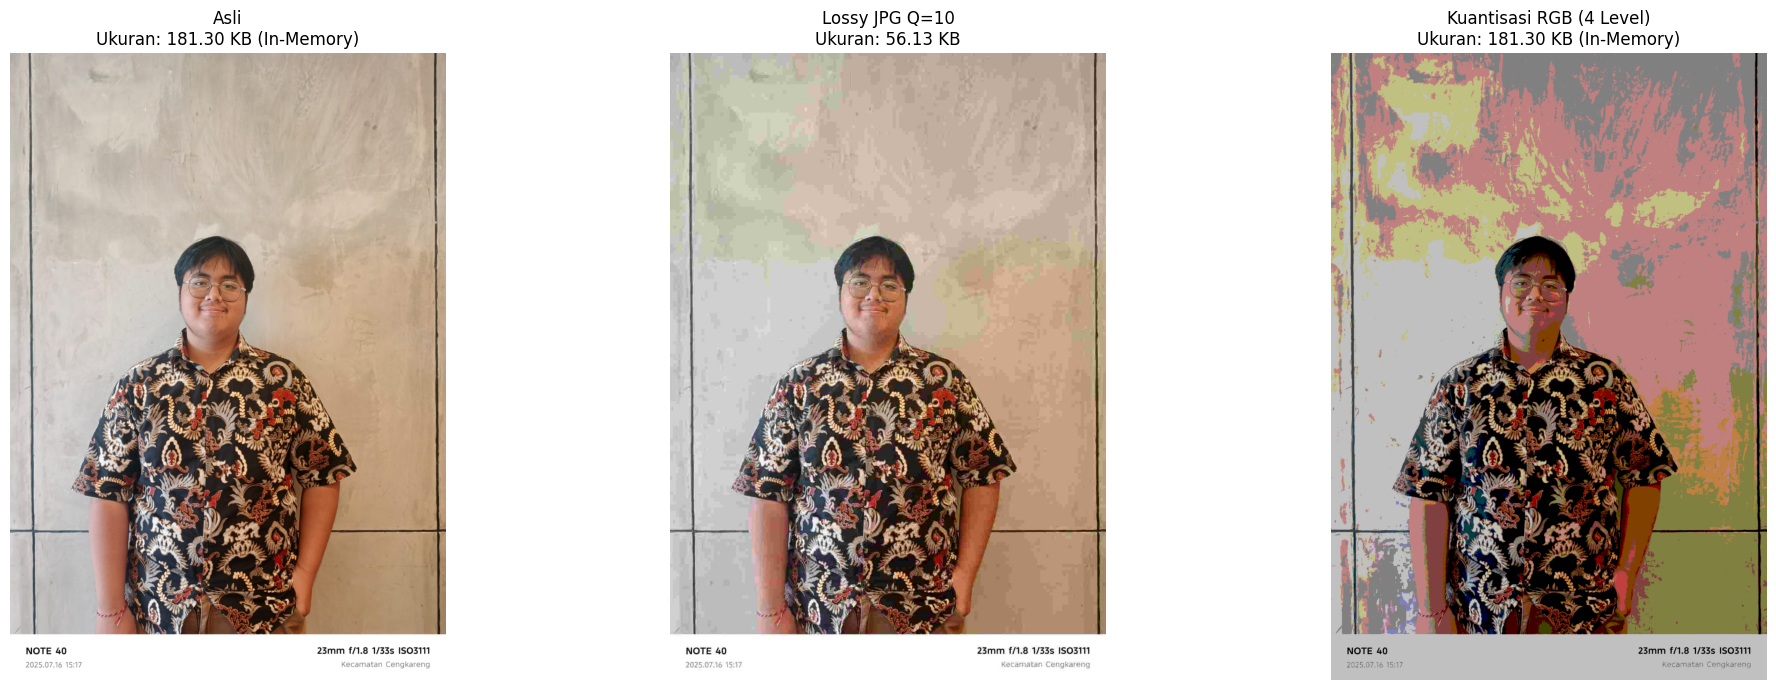

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(21, 7))

axs[0].imshow(cv2.cvtColor(jpg_ori, cv2.COLOR_BGR2RGB))
axs[0].set_title(f'Asli\nUkuran: {size_asli / 1024:.2f} KB (In-Memory)')
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(img_lossy_low, cv2.COLOR_BGR2RGB))
axs[1].set_title(f'Lossy JPG Q=10\nUkuran: {size_jpg_low / 1024:.2f} KB')
axs[1].axis('off')

axs[2].imshow(cv2.cvtColor(img_q, cv2.COLOR_BGR2RGB))
axs[2].set_title(f'Kuantisasi RGB (4 Level)\nUkuran: {size_asli / 1024:.2f} KB (In-Memory)')
axs[2].axis('off')

plt.tight_layout()
plt.show()